# Dell Assessment

In [191]:
import pandas as pd
import numpy as np
import pyrsm as rsm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


#  Data Exploration and Cleaning

### Basic summary statistics


In [288]:
# loading the data 
df = pd.read_csv('Dell_ADSE_DS_DE_MLE_dataset.csv')
df.head()

,asst_id,product_type,mnfture_wk,contract_st,contract_end,contact_wk,contact_type,issue_type,topic_category,parts_sent,repair_type,repeat_ct,parts_ct,agent_tenure_indays,contact_manager_flg,diagnostics,repeat_parts_sent,region,country
0,0,Laptops,201726,201726,202125,201840,Voice,NaN,NaN,"Hard Drive, Documentation(2)",Hard,0,3,1018.0,0,Not_USED,NaN,Hogwarts,NaN
1,1,Laptops,201650,201650,201949,201840,Voice,NaN,NaN,"Speaker, Chassis",Hard,0,2,1018.0,0,Not_USED,NaN,Hogwarts,Zonko's Joke Shop
2,2,Laptops,201821,201821,202222,201840,Voice,NaN,NaN,Cables,Hard,0,1,1018.0,0,Not_USED,"Motherboard, Miscellaneous(2), Hard Drive, Cha...",Hogwarts,Zonko's Joke Shop
3,3,Laptops,201608,201608,201908,201840,VOICE,Hard Drive,Booting,Hard Drive,Hard,0,1,298.0,0,Effective_Usage,NaN,Hogwarts,Zonko's Joke Shop
4,4,Laptops,201732,201732,202032,201840,Voice,NaN,NaN,Battery (Notebook),Hard,0,1,1018.0,0,Not_USED,NaN,Hogwarts,Zonko's Joke Shop


In [289]:
# Overview of the data: column data types, non-null values, etc.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   asst_id              100000 non-null  int64  
 1   product_type         99980 non-null   object 
 2   mnfture_wk           100000 non-null  int64  
 3   contract_st          100000 non-null  int64  
 4   contract_end         100000 non-null  int64  
 5   contact_wk           100000 non-null  int64  
 6   contact_type         99986 non-null   object 
 7   issue_type           85958 non-null   object 
 8   topic_category       66916 non-null   object 
 9   parts_sent           54566 non-null   object 
 10  repair_type          100000 non-null  object 
 11  repeat_ct            100000 non-null  int64  
 12  parts_ct             100000 non-null  int64  
 13  agent_tenure_indays  99986 non-null   float64
 14  contact_manager_flg  100000 non-null  int64  
 15  diagnostics       

In [290]:
# Summary statistics for numerical columns
rsm.describe(df)
# df.describe()

No description attribute available


,asst_id,mnfture_wk,contract_st,contract_end,contact_wk,repeat_ct,parts_ct,agent_tenure_indays,contact_manager_flg
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.00000,99986.000000,100000.000000
mean,35702.117890,201672.108910,201671.595910,201951.897740,201840.0,0.074090,1.15955,985.886844,0.012430
std,25038.092288,156.139692,158.940598,186.777325,0.0,0.262491,1.56942,862.044503,0.110795
min,0.000000,201001.000000,200547.000000,201006.000000,201840.0,0.000000,0.00000,218.000000,0.000000
25%,12382.750000,201612.000000,201612.000000,201903.000000,201840.0,0.000000,0.00000,536.000000,0.000000
50%,32898.500000,201719.000000,201720.000000,201938.000000,201840.0,0.000000,1.00000,801.000000,0.000000
75%,57701.250000,201808.000000,201809.000000,202045.000000,201840.0,0.000000,2.00000,1018.000000,0.000000
max,82441.000000,201927.000000,202630.000000,202953.000000,201840.0,3.000000,51.00000,8922.000000,1.000000


In [291]:
# Count of missing values in each column
missing_values = df.isnull().sum()
missing_values


asst_id                    0
product_type              20
mnfture_wk                 0
contract_st                0
contract_end               0
contact_wk                 0
contact_type              14
issue_type             14042
topic_category         33084
parts_sent             45434
repair_type                0
repeat_ct                  0
parts_ct                   0
agent_tenure_indays       14
contact_manager_flg        0
diagnostics                0
repeat_parts_sent      86654
region                     3
country                10002
dtype: int64

### Dealing with missing values

#### Product type


In [292]:
# Filling missing values with a new category called "Not Specified". 
df['product_type'].fillna('Not Specified', inplace=True)
print(df['product_type'].value_counts(dropna=False))


product_type
Laptops              73052
Desktops             23601
Other Electronics     3327
Not Specified           20
Name: count, dtype: int64


- This keeps the missing values identifiable and doesn't add bias to existing categories.

#### Contact type

In [293]:
print(df['contact_type'].value_counts(dropna=False))


contact_type
VOICE      69757
CHAT       14425
Voice      14405
EMAIL       1281
Unknown      118
NaN           14
Name: count, dtype: int64


In [294]:
# Dealing with case sensitivity and combining Nan and unknown together
df['contact_type'] = df['contact_type'].str.upper()
df['contact_type'].fillna('UNKNOWN', inplace=True)
print(df['contact_type'].value_counts(dropna=False))


contact_type
VOICE      84162
CHAT       14425
EMAIL       1281
UNKNOWN      132
Name: count, dtype: int64


#### Issue type and topic category

In [295]:
print(df['issue_type'].value_counts(dropna=False))


issue_type
NaN                                 14042
System Board Components             13076
Fee Based Support                   10188
Operating System                     9707
Audio, Video, Speakers, TV Tuner     8492
                                    ...  
Compellent - Hardware                   2
Never Shipped / Fulfilled               2
Try & Buy                               1
MWD                                     1
Lost / Stolen in Transit                1
Name: count, Length: 83, dtype: int64


- `issue_type` column has a lot of NaN values. I have  decided to fill them with the placeholder value `Unknown`. This makes sense since not every customer might be able to identify the exact issue or the issue might be unspecified.

In [296]:
df['issue_type'].fillna('Unknown', inplace=True)


In [297]:
print(df['topic_category'].value_counts(dropna=False))

topic_category
NaN                     33084
Booting                 15343
LCD/Monitor              5452
Call Logs                4837
General Queries          4141
                        ...  
Sim Card                    6
Firmware                    5
System Configuration        3
Vmware                      2
Miracast                    1
Name: count, Length: 64, dtype: int64


In [298]:
# Checking the relationship between topic_category and issue_type
grouped = df.groupby('topic_category')['issue_type'].value_counts()
print(grouped)


topic_category  issue_type                                      
AC Adaptor      Power Subsystem / Cables / AC Adapter               147
                System Board Components                              37
                Fee Based Support                                     9
                Input Device / Webcam                                 7
                Hard Drive                                            7
                                                                   ... 
Webcam          Dell Mobile Devices                                   1
                CFA, MFA (Customer or Manufacturer) Field Action      1
                Battery / CMOS                                        1
                Backup / Recovery Software                            1
                Adobe                                                 1
Name: count, Length: 1366, dtype: int64


In [299]:
# Find the most common issue_type for each topic_category
common_issues = df.groupby('topic_category')['issue_type'].apply(lambda x: x.mode()[0])

# Display the mapping
print(common_issues)


topic_category
AC Adaptor                      Power Subsystem / Cables / AC Adapter
Antivirus                               Security / Antivirus Software
App/Software                                        Fee Based Support
Audio Device                         Audio, Video, Speakers, TV Tuner
BIOS                                          System Board Components
                                                ...                  
Touchscreen                          Audio, Video, Speakers, TV Tuner
USB                                           System Board Components
Virus/Adware/Malware/Spyware                        Fee Based Support
Vmware                                             Information Status
Webcam                                          Input Device / Webcam
Name: issue_type, Length: 63, dtype: object


In [300]:
# the most common topic_category for each issue_type
common_topics = df.groupby('issue_type')['topic_category'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else "Unknown")
print(common_topics)


issue_type
Adobe                                       App/Software
Audio, Video, Speakers, TV Tuner             LCD/Monitor
Backplane                                        Booting
Backup / Archive / Data Management               Booting
Backup / Recovery Software                       Booting
                                             ...        
Systems Management                               Booting
Tape Drive or Library                            Booting
Try & Buy                                        Unknown
Unknown                                          Booting
Wrong Solution / Product Sold         Incorrect Shipment
Name: topic_category, Length: 83, dtype: object


In [301]:
# Setting 'topic_category' as 'Unknown' only where 'issue_type' is 'Unknown' and 'topic_category' is NaN
df.loc[(df['issue_type'] == 'Unknown') & (df['topic_category'].isna()), 'topic_category'] = 'Unknown'

- Creating a Series that maps each `issue_type` to its most common `topic_category` using the `common_topics` mapping I generated.


In [302]:
# Filling NaN values in topic_category using the mapping from issue_type
df['topic_category'] = df['topic_category'].fillna(df['issue_type'].map(common_topics))
print(df['topic_category'].value_counts(dropna=False))


topic_category
Booting                 24040
Unknown                 14019
LCD/Monitor              7512
General Queries          5920
Call Logs                5463
                        ...  
Stylus                      6
Firmware                    5
System Configuration        3
Vmware                      2
Miracast                    1
Name: count, Length: 64, dtype: int64


In [303]:
print(df['topic_category'].isna().sum())


0


#### Parts Sent

In [304]:
print(df['parts_sent'].value_counts(dropna=False))


parts_sent
NaN                                                                                                                                    45434
Hard Drive                                                                                                                              4504
Motherboard, Documentation                                                                                                              4405
LCD Panel                                                                                                                               3022
Keyboard                                                                                                                                2981
                                                                                                                                       ...  
Miscellaneous(2), Mechanical Hardware, Electrical Components                                                                               1
Mo

##### Hypothesis
- Assuming if there's no entry in the `parts_sent` column, it could very well indicate that no parts were sent to the customer. 
- This is especially plausible if the nature of the issue didn't require a physical part replacement or if troubleshooting resolved the issue without the need for sending out parts.

##### To support this hypothesis Cross-referencing with `repair_type` column. 
- For example, if there's a column that indicates the problem was resolved without hardware intervention or if the `repair_type` suggests a software fix, then that supports the idea that no parts were needed.

In [305]:
# Checking unique values of repair type
print(df['repair_type'].value_counts())


repair_type
Hard    59495
Soft    40505
Name: count, dtype: int64


In [306]:
# parts sent for "Soft" repairs
print(df[df['repair_type'] == 'Soft']['parts_sent'].value_counts(dropna=False).head())


parts_sent
NaN    40505
Name: count, dtype: int64


In [307]:
# parts sent for "Hard" repairs
print(df[df['repair_type'] == 'Hard']['parts_sent'].value_counts(dropna=False).head())


parts_sent
NaN                           4929
Hard Drive                    4504
Motherboard, Documentation    4405
LCD Panel                     3022
Keyboard                      2981
Name: count, dtype: int64


- This reinforces the hypothesis that for `Soft` repairs, no parts are typically required (since it might be software or configuration issues). Hence, the NaN values in the parts_sent column can be interpreted as  `No Parts Sent` specifically for `Soft` repairs.

##### For `Hard` repairs, there are still 4929 instances where no parts are specified. This could be due to various reasons:

- Maybe the repair required an onsite visit without replacing parts.
- It could be a data entry error.
- Some other procedural reasons.

In [308]:
# Replacing NaN for Soft repairs
df.loc[df['repair_type'] == 'Soft', 'parts_sent'] = df.loc[df['repair_type'] == 'Soft', 'parts_sent'].fillna('No Parts Sent')

# Replacing NaN for Hard repairs
df.loc[df['repair_type'] == 'Hard', 'parts_sent'] = df.loc[df['repair_type'] == 'Hard', 'parts_sent'].fillna('Not Specified')


####  Agent tenure in days

In [309]:
# since there are only 14 missing values using simple imputation with central tendency
median_tenure = df['agent_tenure_indays'].median()
df['agent_tenure_indays'].fillna(median_tenure, inplace=True)


#### Repeat parts sent

In [310]:
print(df['repeat_parts_sent'].value_counts(dropna=False))

repeat_parts_sent
NaN                                                             86654
Motherboard, Documentation                                       1081
Motherboard                                                       655
LCD Panel                                                         649
Chassis                                                           605
                                                                ...  
Motherboard(4), Miscellaneous(2), Heatsink(3), Documentation        1
Motherboard, Miscellaneous, Documentation, Chassis(2)               1
Hard Drive, Electrical Components, Documentation(2)                 1
PCBA - Misc., Chassis, Cables                                       1
Mouse, LCD Panel, Hard Drive, Chassis, Cables(2)                    1
Name: count, Length: 1562, dtype: int64


The majority of the values in the `repeat_parts_sent` column are missing (NaN). This means that for a large number of cases, no parts were sent on a repeat visit. This can be indicative of one of two scenarios:

- There was no repeat visit required, hence no parts were sent.
- There was a repeat visit, but no parts were sent during the repeat.

In [311]:
# For rows where Repeat_ct is 0 and repeat_parts_sent is NaN
df.loc[(df['repeat_ct'] == 0) & (df['repeat_parts_sent'].isnull()), 'repeat_parts_sent'] = 'No Repeat Visit'
# Checking null values
print(df['repeat_parts_sent'].isna().sum()) 


183


In [312]:
# For rows where Repeat_ct is greater than 0 and repeat_parts_sent is NaN
df.loc[(df['repeat_ct'] > 0) & (df['repeat_parts_sent'].isnull()), 'repeat_parts_sent'] = 'No Parts Sent on Repeat'
# Checking null values
print(df['repeat_parts_sent'].isna().sum()) 

0


##### There are few cases where there were no additional visits but parts sent on additional visit have values
- Marking this as one of the anomalies, need to do further analysis to understand the pattern


In [313]:
# Number of entries where Repeat_ct is 0 but repeat_parts_sent is not NaN
anomalies = df[(df['repeat_ct'] == 0) & (df['repeat_parts_sent']!='No Repeat Visit')]
print(len(anomalies))


6132



- Analyzed columns `repeat_parts_sent` and `repeat_ct` from the dataset.
- Definitions:
  - `repeat_parts_sent`: Parts sent on additional visits.
  - `repeat_ct`: Number of additional visits required post the initial one.
- Identified inconsistency:
  - 6132 entries where `repeat_ct` is 0 but `repeat_parts_sent` has values.
- Potential implications:
  - Data collection or input error.
  - Preemptive parts sent to customers without an additional visit.
  - Misinterpretation or misuse of the `repeat_ct` field.
- Potential Business Insights: 
  - The fact that parts were sent without additional visits might indicate an attempt to solve issues without in-person visits. This can be seen as a cost-saving measure or a customer convenience strategy. However, whether it's effective or not will depend on the broader context, which can be investigated further.


### Region and Country

In [314]:
# using crosstab to check the number of occurrences of each combination of Country and Region 
cross_tab = pd.crosstab(df['country'], df['region'])
print(cross_tab)


region             Hogwarts  Middle Earth  Milky Way
country                                             
Acrux                     0             0         14
Alcor                     0             0          4
Aldebaran                 0             0          4
Altair                    0             0          3
Antares                   0             0         23
Arcturus                  0             0         20
Becrux                    0             0         30
Bellatrix                 0             0          1
Betelgeuse                0             0          1
Bree                      0             3          0
Canopus                   0             0         12
Capella                   0             0         18
Castor                    0             0          7
Diagon Alley              4             0          0
Erebor                    0             4          0
Fangorn                   0            14          0
Fomalhaut                 0             0     

- There is no one to one relationship between `country` and `region`
- There is no other column that provides location and can't use external knowledge as the data is made up
- Computing most dominant country for each region and vice versa
- Filling missing countries using the dominant country for each region and vice vera

In [315]:
# For missing countries based on region
region_to_dom_country = df.dropna().groupby('region')['country'].apply(lambda x: x.mode().iloc[0])
df['country'] = df['country'].fillna(df['region'].map(region_to_dom_country))

# For missing regions based on country
country_to_dom_region = df.dropna().groupby('country')['region'].apply(lambda x: x.mode().iloc[0])
df['region'] = df['region'].fillna(df['country'].map(country_to_dom_region))


In [316]:
# Checking Nan
df[['region', 'country']].isna().sum()



region     3
country    3
dtype: int64

- Since there are only three values with Nan, dropping these rows would be the best choice
- Replacing them with unknown for now as other columns might have important information


In [318]:
df['country'].fillna('Unknown', inplace=True)
df['region'].fillna('Unknown', inplace=True)

In [319]:
# Ensuring all the missing values are dealt with
df.isnull().sum()

asst_id                0
product_type           0
mnfture_wk             0
contract_st            0
contract_end           0
contact_wk             0
contact_type           0
issue_type             0
topic_category         0
parts_sent             0
repair_type            0
repeat_ct              0
parts_ct               0
agent_tenure_indays    0
contact_manager_flg    0
diagnostics            0
repeat_parts_sent      0
region                 0
country                0
tenure_bins            0
dtype: int64

### Visualizing the data to detect outliers 

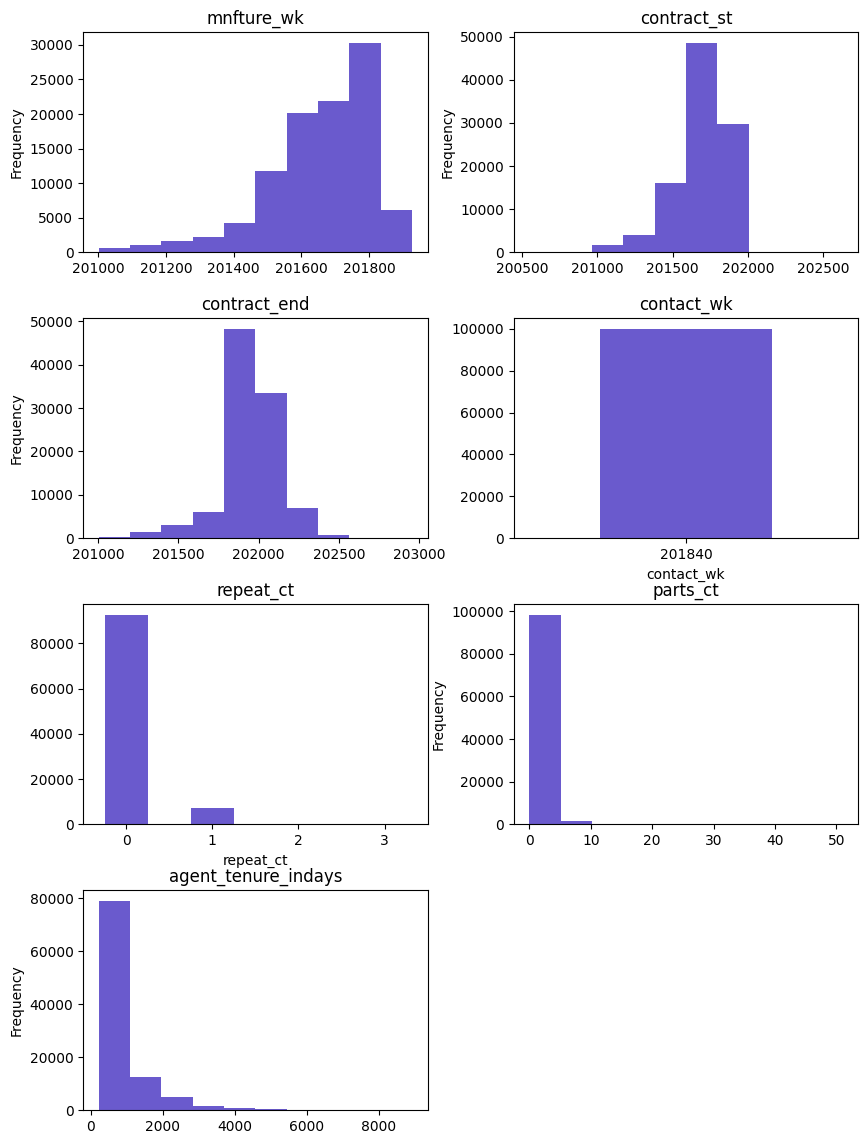

In [320]:
numerical_cols = ['mnfture_wk', 'contract_st', 'contract_end', 'contact_wk', 'repeat_ct', 'parts_ct', 'agent_tenure_indays']
rsm.distr_plot(df[numerical_cols])

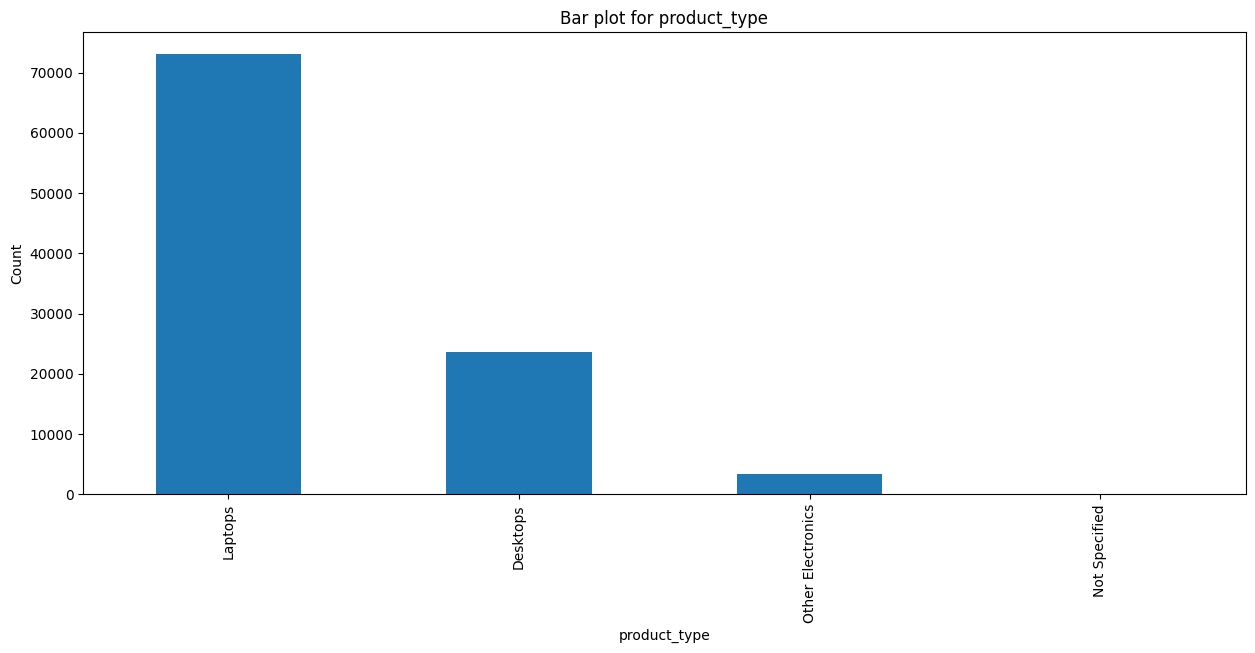

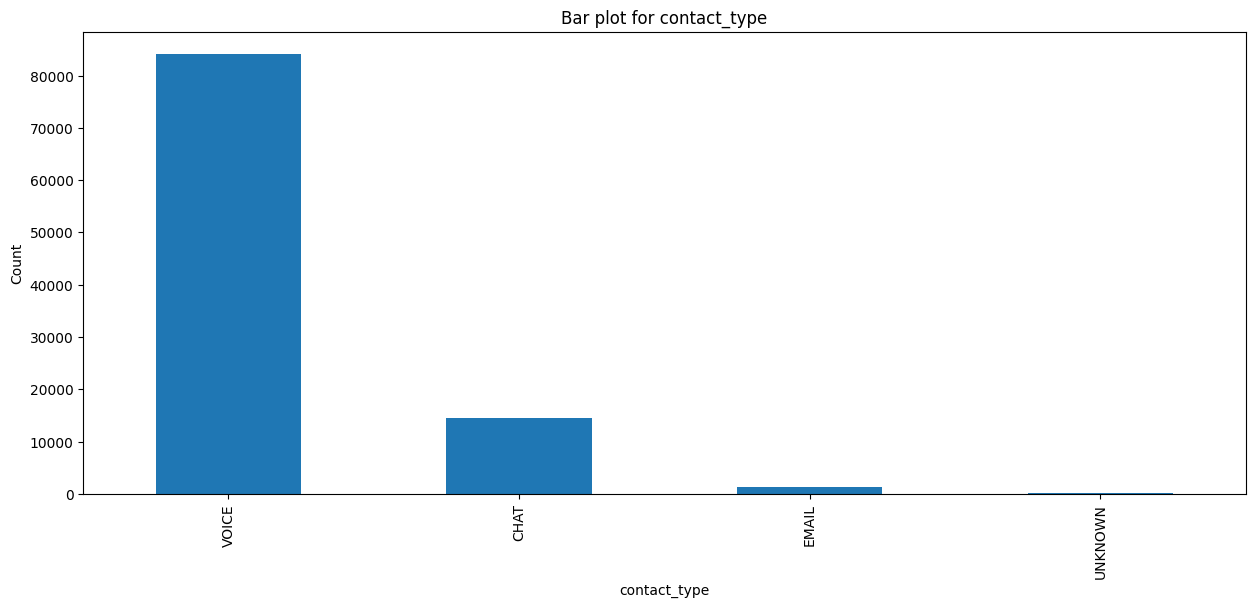

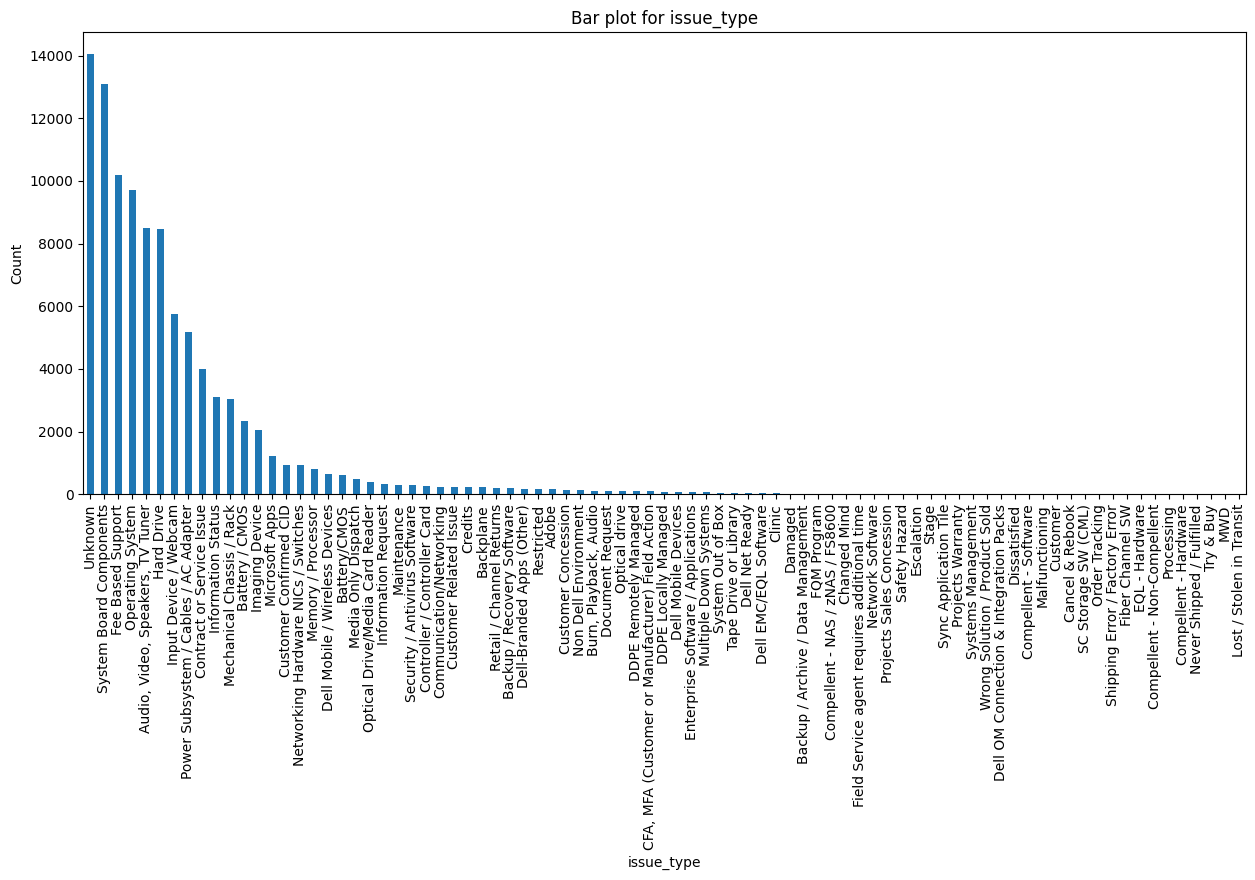

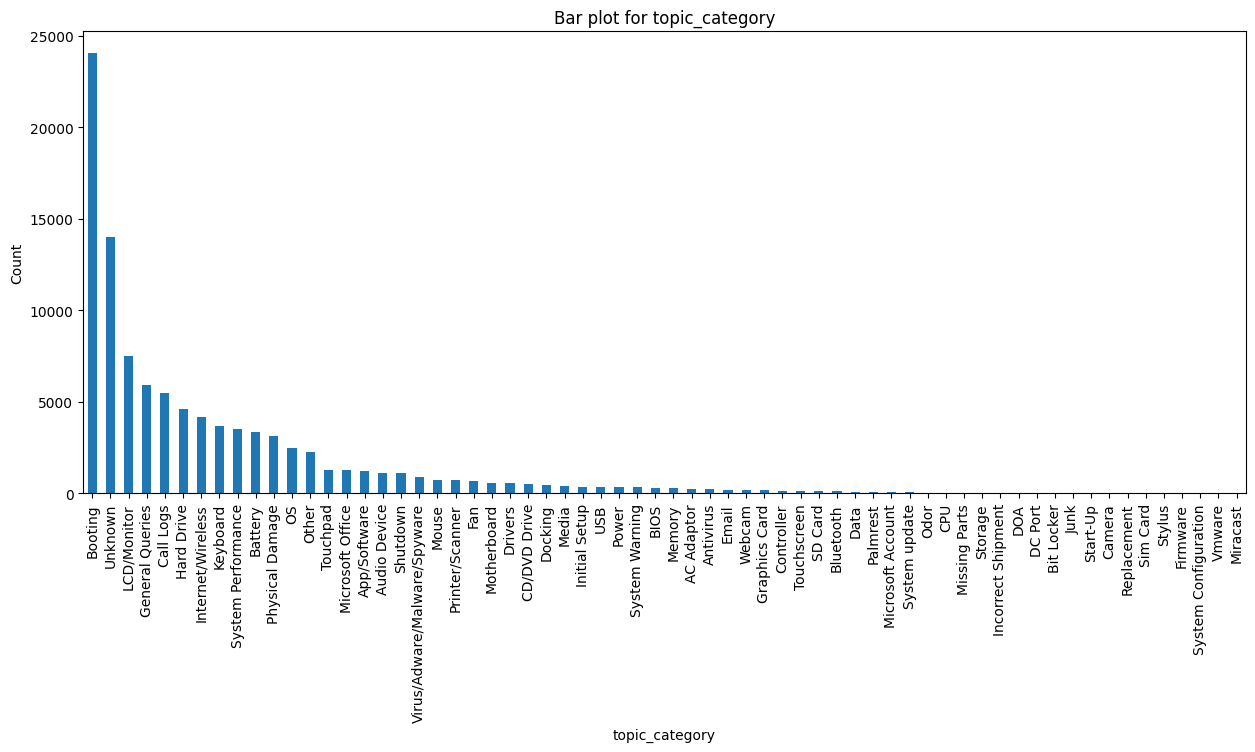

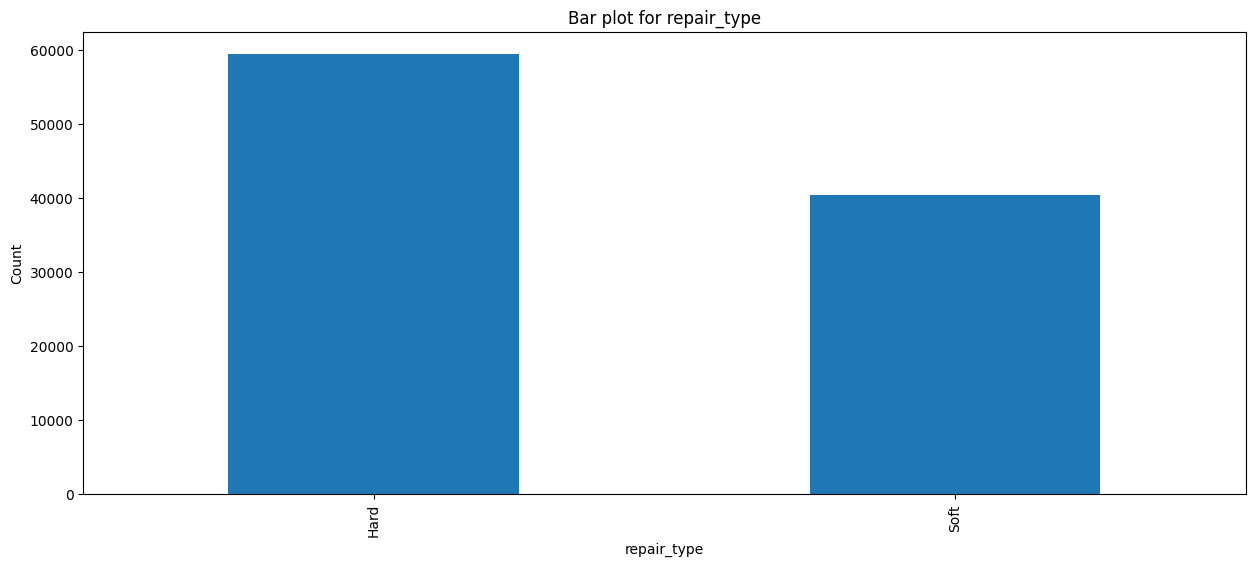

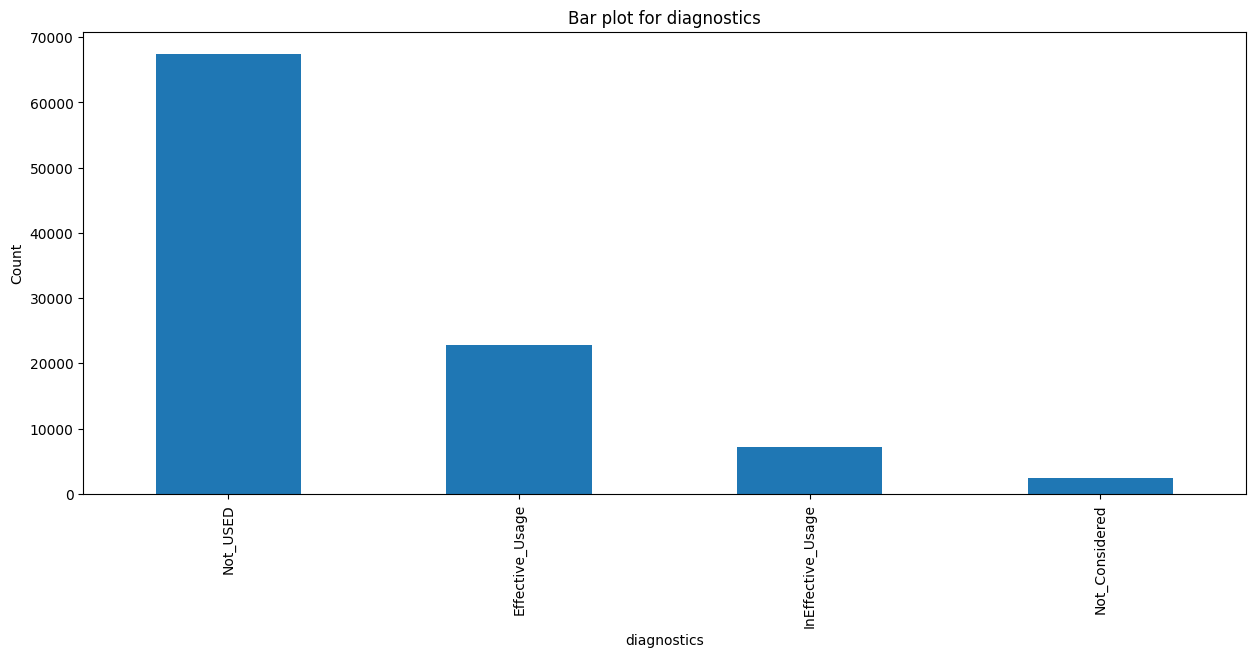

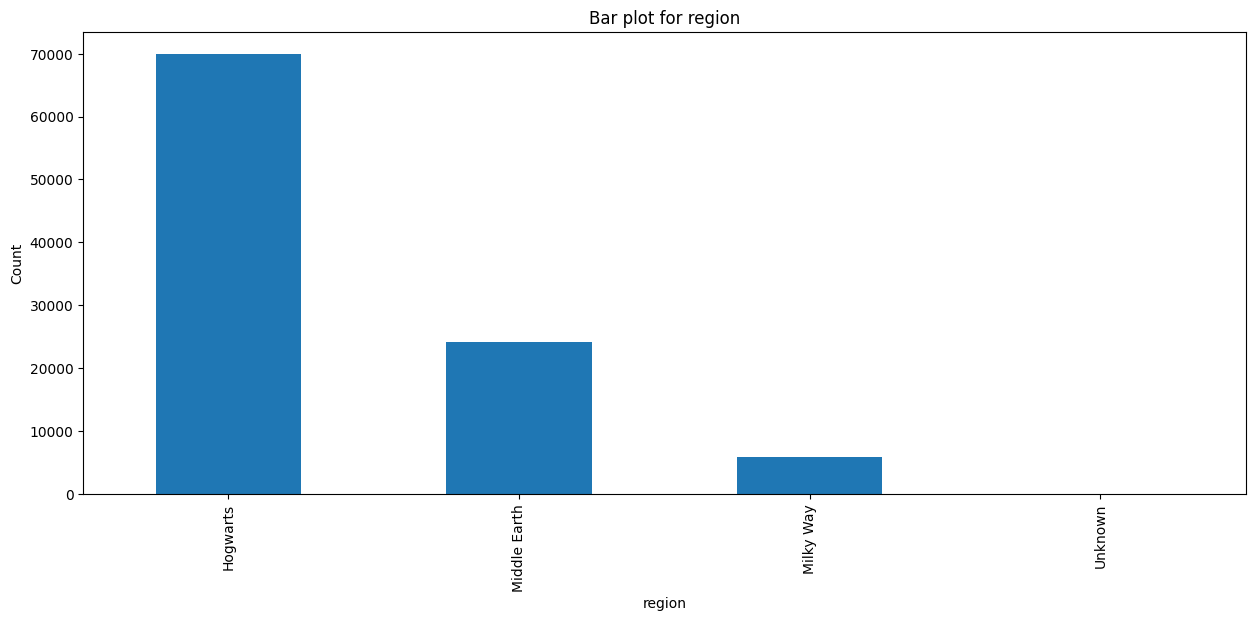

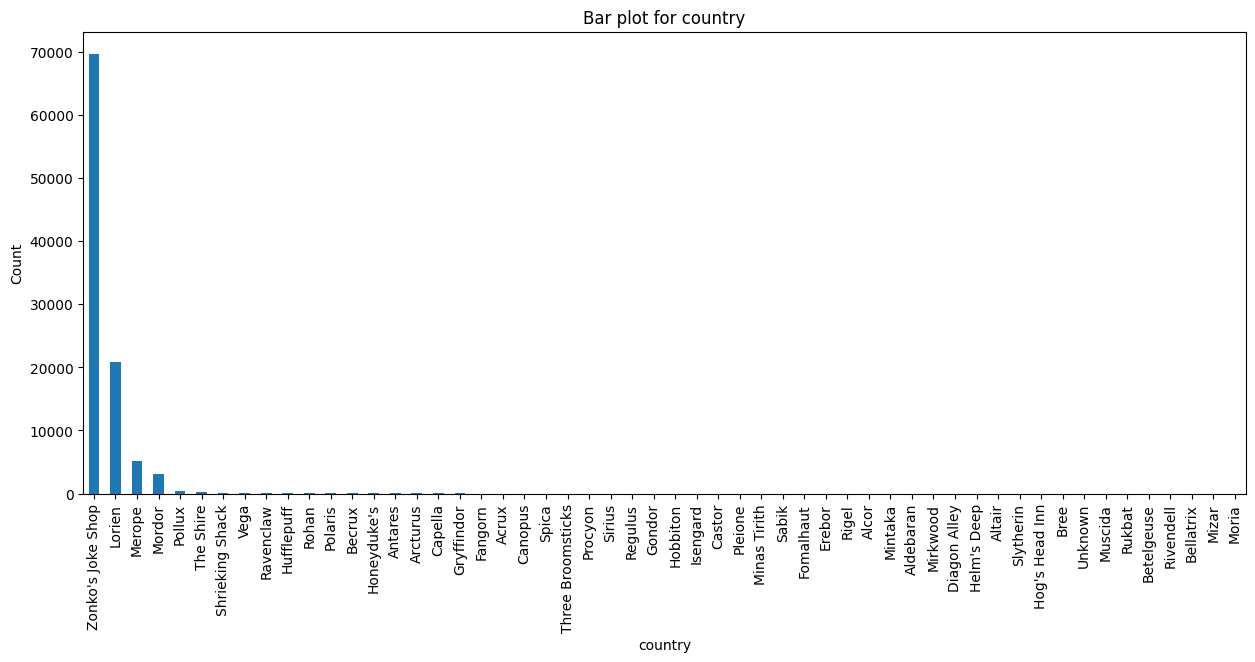

In [321]:
# Categorical columns
categorical_cols1 = ['product_type', 'contact_type', 'issue_type', 'topic_category', 'repair_type', 'diagnostics', 'region', 'country']
categorical_cols2 = ['parts_sent','repeat_parts_sent']
for col in categorical_cols1:
    plt.figure(figsize=(15, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar plot for {col}')
    plt.ylabel('Count')
    plt.show()

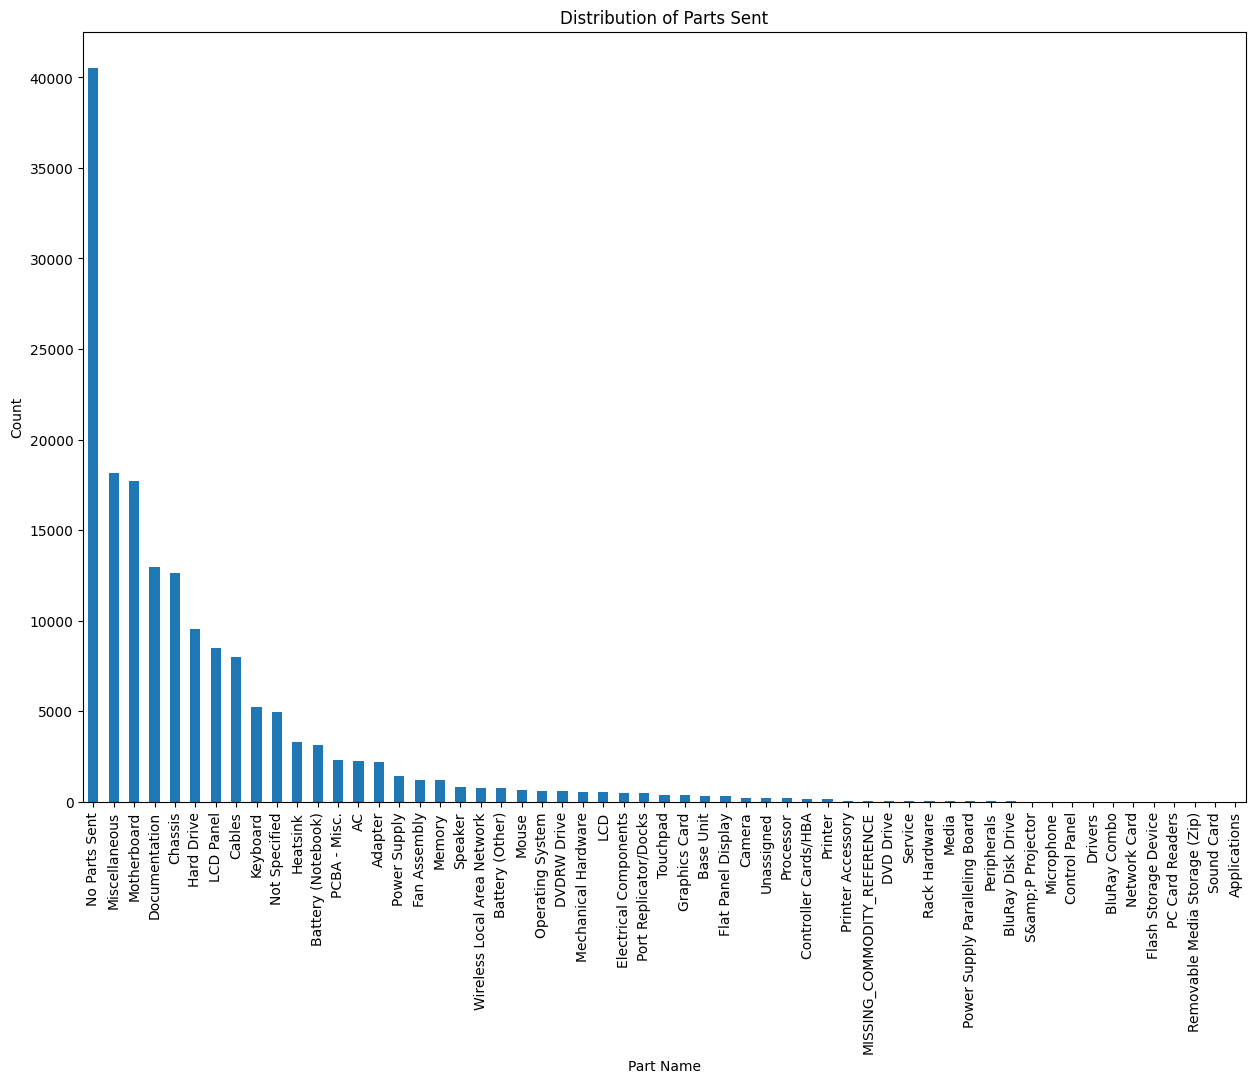

In [322]:
# Splitting the entries and exploding them into separate rows
parts_df = df['parts_sent'].str.split(', ').explode().str.strip()

# Splitting each entry on '(' to separate part and count
parts_df = parts_df.str.extract(r'(?P<part>.*?)(?:\((?P<count>\d+)\))?$')

# Converting count to integer and replacing NaNs with 1 (since a missing count implies 1)
parts_df['count'] = parts_df['count'].fillna(1).astype(int)

# Group by the part and sum the counts
part_counts = parts_df.groupby('part')['count'].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 10))
part_counts.plot(kind='bar')
plt.title('Distribution of Parts Sent')
plt.ylabel('Count')
plt.xlabel('Part Name')
plt.show()

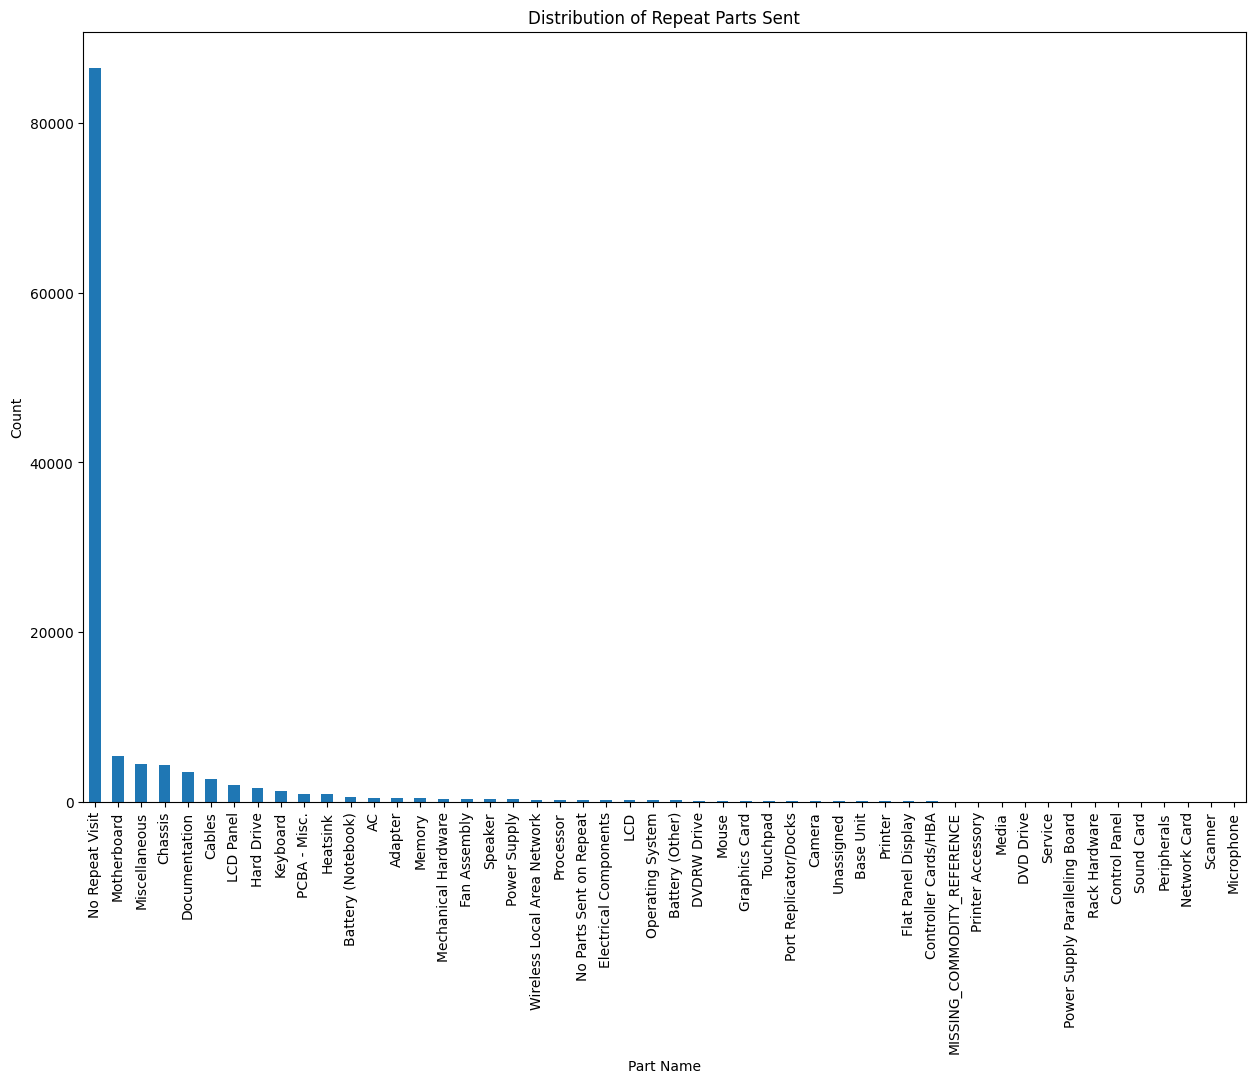

In [323]:
# Splitting the entries and exploding them into separate rows
repeat_parts_df = df['repeat_parts_sent'].str.split(', ').explode().str.strip()

# Splitting each entry on '(' to separate part and count
repeat_parts_df = repeat_parts_df.str.extract(r'(?P<part>.*?)(?:\((?P<count>\d+)\))?$')

# Converting count to integer and replacing NaNs with 1 (since a missing count implies 1)
repeat_parts_df['count'] = repeat_parts_df['count'].fillna(1).astype(int)

# Group by the part and sum the counts
repeat_parts_df = repeat_parts_df.groupby('part')['count'].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 10))
repeat_parts_df.plot(kind='bar')
plt.title('Distribution of Repeat Parts Sent')
plt.ylabel('Count')
plt.xlabel('Part Name')
plt.show()

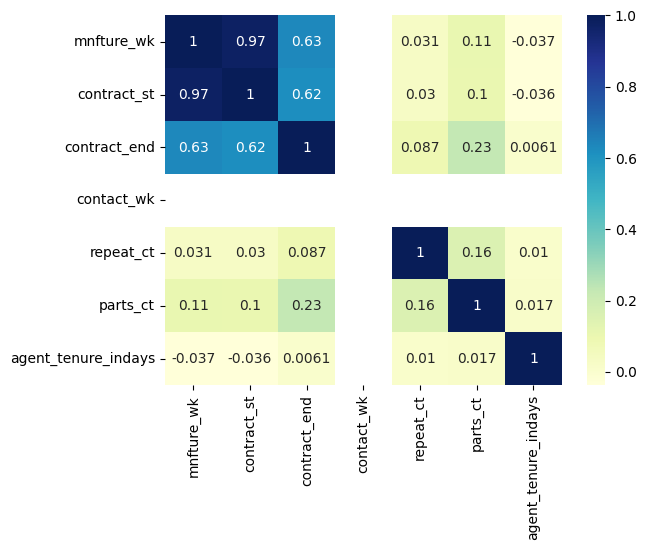

In [324]:
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

In [329]:

# Defining bins
bins = [0, 300, 600, 900, 1200, 2000, np.inf]
labels = ["0-300 days", "300-600 days", "600-900 days", "900-1200 days", "1200-2000 days", "2000+ days"]

df['tenure_bins'] = pd.cut(df['agent_tenure_indays'], bins=bins, labels=labels, right=False)

bin_counts_new = df['tenure_bins'].value_counts().sort_index()
print(bin_counts_new)


tenure_bins
0-300 days         5249
300-600 days      24967
600-900 days      28658
900-1200 days     23974
1200-2000 days     9164
2000+ days         7988
Name: count, dtype: int64


### Anomalies and outliers

No repeated contact but additional parts sent on visit

In [231]:
# Checking if the discrepancies are more common in a particular region.
region_anomalies = df[(df['repeat_ct'] == 0) & (df['repeat_parts_sent'] != 'No Repeat Visit')]['region'].value_counts()
print(region_anomalies)


region
Hogwarts        4558
Middle Earth    1275
Milky Way        299
Name: count, dtype: int64


In [232]:
# Determining if certain product types have more discrepancies.
product_anomalies = df[(df['repeat_ct'] == 0) & (df['repeat_parts_sent'] != 'No Repeat Visit')]['product_type'].value_counts()
print(product_anomalies)


product_type
Laptops              5073
Desktops              686
Other Electronics     373
Name: count, dtype: int64


In [233]:
# Checking if there's a specific timeframe (like a particular manufacturing week) when these discrepancies occurred more.
mnfcture_wk_anomalies = df[(df['repeat_ct'] == 0) & (df['repeat_parts_sent'] != 'No Repeat Visit')]['mnfture_wk'].value_counts()
print(mnfcture_wk_anomalies)


mnfture_wk
201520    207
201523    147
201613    118
201816     91
201524     89
         ... 
201308      1
201441      1
201852      1
201425      1
201238      1
Name: count, Length: 270, dtype: int64


In [234]:
# Checking if discrepancies are more common with a particular mode of contact.
contact_type_anomalies = df[(df['repeat_ct'] == 0) & (df['repeat_parts_sent']!= 'No Repeat Visit')]['contact_type'].value_counts()
print(contact_type_anomalies)


contact_type
VOICE      5224
CHAT        762
EMAIL       141
UNKNOWN       5
Name: count, dtype: int64


In [235]:
# Determining if certain issues or topics are associated with more discrepancies.
issue_anomalies = df[(df['repeat_ct'] == 0) & (df['repeat_parts_sent'] != 'No Repeat Visit')]['issue_type'].value_counts()
print(issue_anomalies)



issue_type
Unknown                                             2782
System Board Components                              919
Audio, Video, Speakers, TV Tuner                     508
Hard Drive                                           458
Input Device / Webcam                                402
Power Subsystem / Cables / AC Adapter                340
Mechanical Chassis / Rack                            251
Battery / CMOS                                       151
Imaging Device                                        72
Networking Hardware NICs / Switches                   45
Memory / Processor                                    42
Optical Drive/Media Card Reader                       23
Dell Mobile / Wireless Devices                        23
Contract or Service Issue                             20
Controller / Controller Card                          14
Backplane                                             14
Retail / Channel Returns                               9
CFA, MFA (Customer o

In [236]:

topic_anomalies = df[(df['repeat_ct'] == 0) & (df['repeat_parts_sent'] != 'No Repeat Visit')]['topic_category'].value_counts()
print(topic_anomalies)

topic_category
Unknown                         2782
Booting                         1016
LCD/Monitor                      403
Hard Drive                       245
Keyboard                         240
Call Logs                        238
Physical Damage                  186
Battery                          162
Internet/Wireless                120
System Performance                99
Touchpad                          77
Shutdown                          65
Other                             60
Motherboard                       46
General Queries                   43
Audio Device                      41
Mouse                             36
Fan                               33
Power                             28
Docking                           26
CD/DVD Drive                      23
OS                                21
USB                               19
System Warning                    18
AC Adaptor                        16
Webcam                            13
Memory                 

In [330]:
# Analyzing if newer or more experienced agents have more discrepancies.
agent_tenure_anomalies = df[(df['repeat_ct'] == 0) & (df['repeat_parts_sent']!= 'No Repeat Visit')]['tenure_bins'].value_counts()  
# Using bins for the tenure days for better representation
print(agent_tenure_anomalies)


tenure_bins
900-1200 days     3218
600-900 days       996
300-600 days       980
1200-2000 days     374
2000+ days         351
0-300 days         213
Name: count, dtype: int64


In [238]:
# Creating data backup before transformation 
original_df = df
#df = original_df

In [240]:
# Converting weeks to date time format
def week_to_date(week_num):
    if isinstance(week_num, (int, np.int64)):  # Ensuring we're working with an integer
        year = week_num // 100
        week = week_num % 100
        # Using ISO week date system (Monday as first day)
        return datetime.datetime.strptime(f'{year}-W{week}-1', "%Y-W%U-%w").date()
    return week_num  # Return the input unchanged if it's not an integer

df['mnfture_wk'] = df['mnfture_wk'].apply(week_to_date)
df['contract_st'] = df['contract_st'].apply(week_to_date)
df['contract_end'] = df['contract_end'].apply(week_to_date)



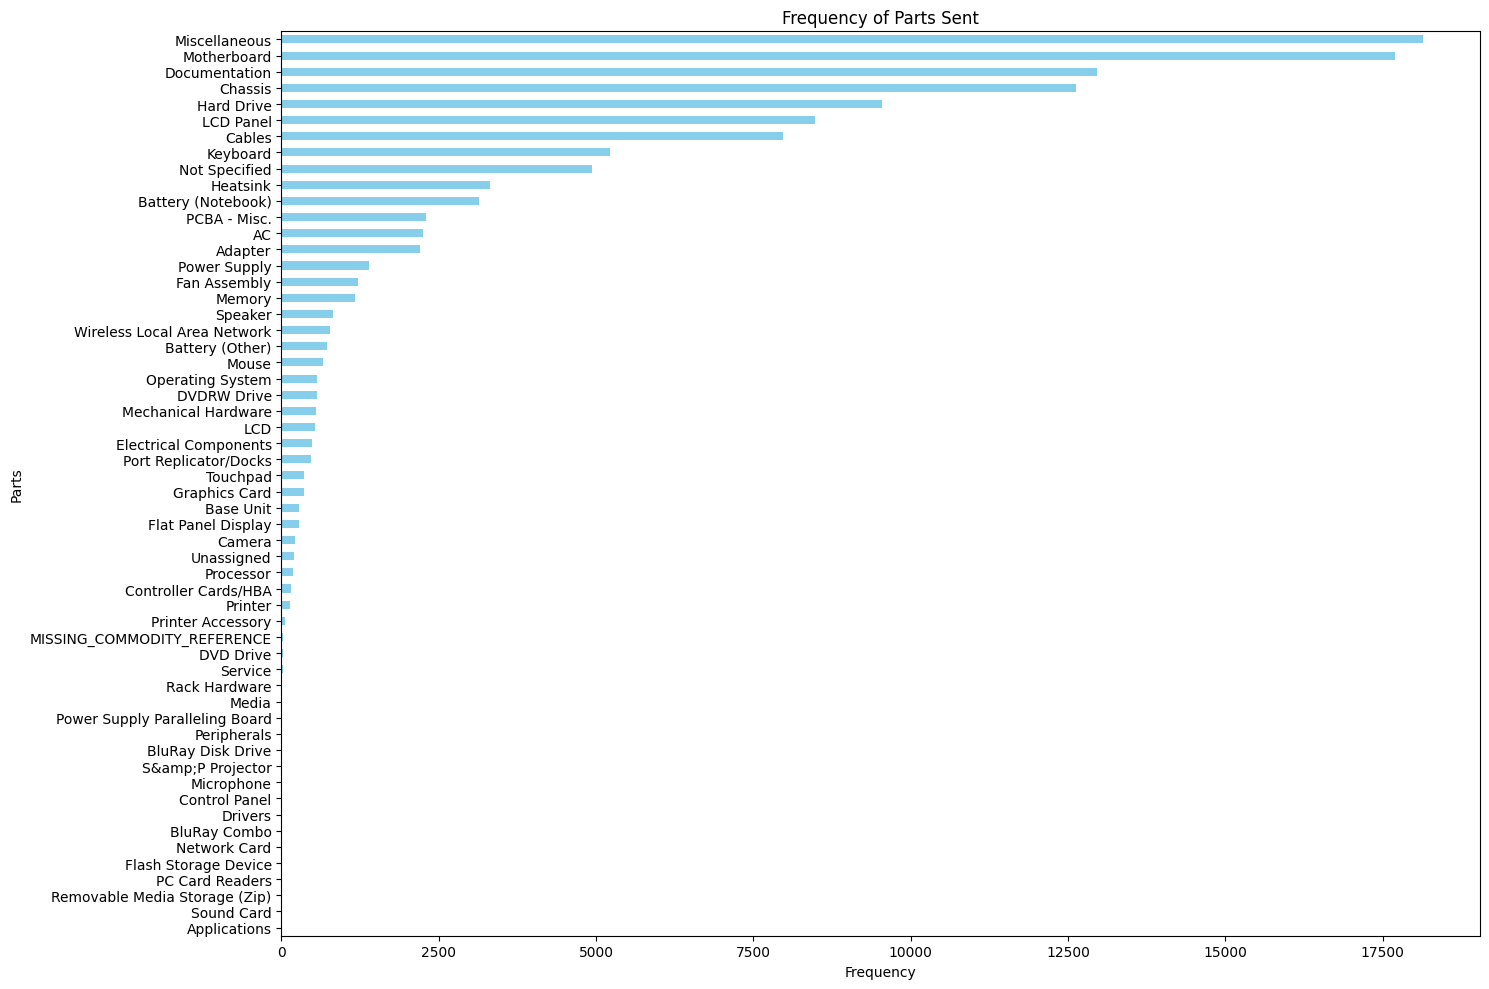

In [246]:

part_frequencies = parts_df.groupby('part')['count'].sum().sort_values(ascending=False)
# Removing 'No Parts Sent' entry
part_frequencies = part_frequencies.drop('No Parts Sent', errors='ignore')
plt.figure(figsize=(15, 10))
part_frequencies.plot(kind='barh', color='skyblue')
plt.ylabel('Parts')
plt.xlabel('Frequency')
plt.title('Frequency of Parts Sent')
plt.gca().invert_yaxis()  # To have the part with the highest frequency on top
plt.tight_layout()
plt.show()



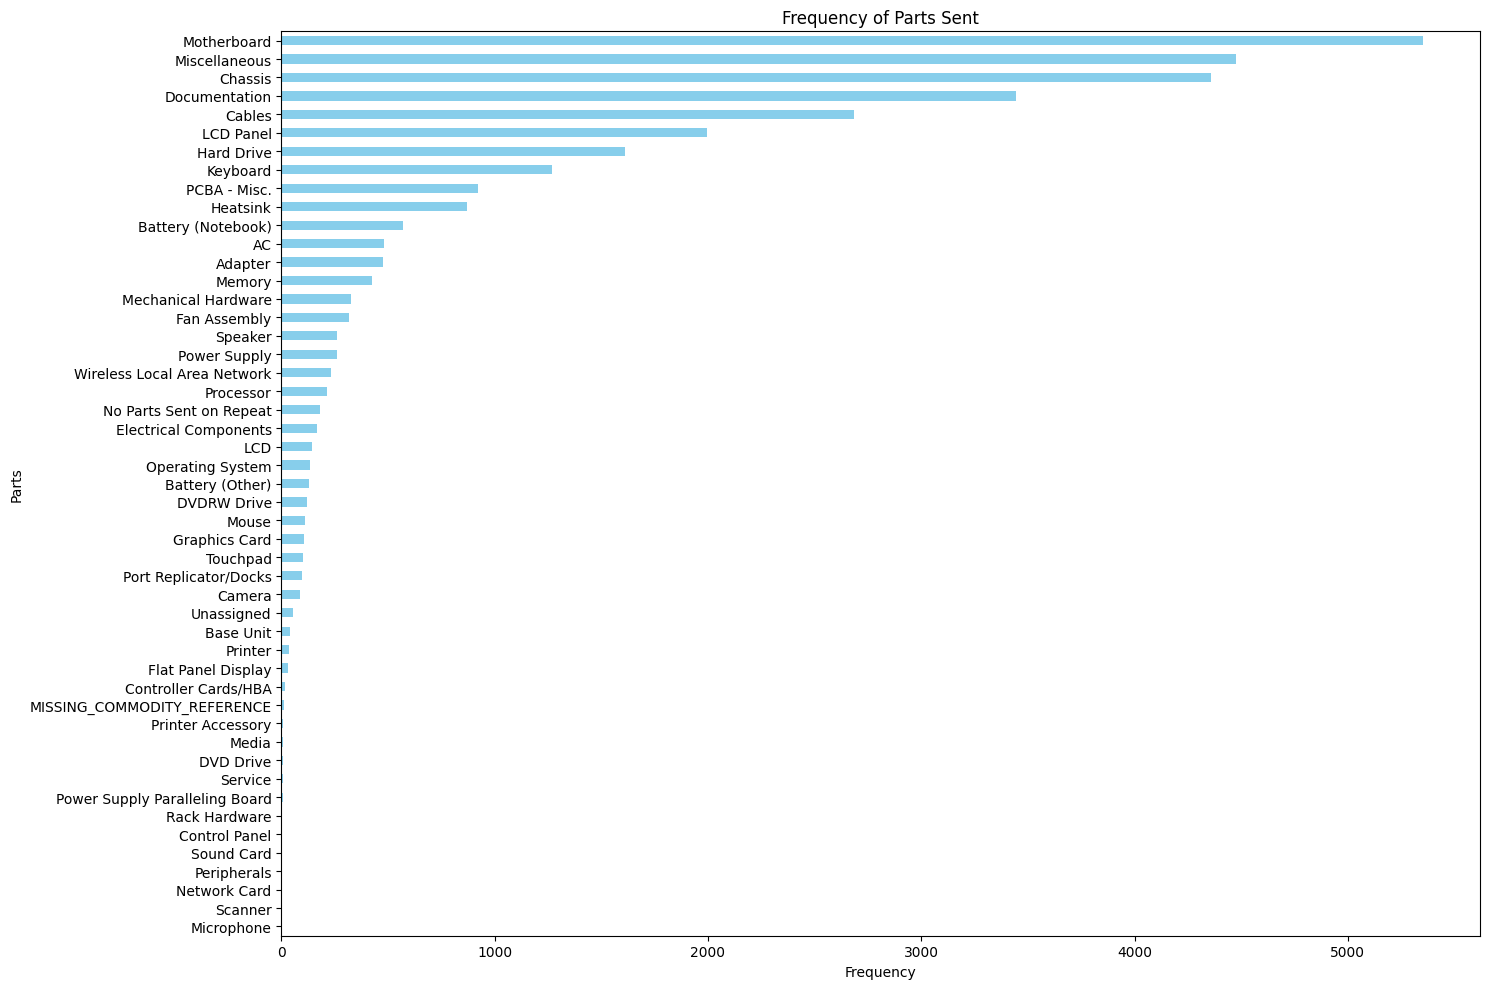

In [257]:
repeat_part_frequencies = repeat_parts_df
# Removing 'No Repeat Visit' entry
repeat_part_frequencies = repeat_part_frequencies.drop('No Repeat Visit', errors='ignore') # have to drop no parts sent on repeat too
plt.figure(figsize=(15, 10))
repeat_part_frequencies.plot(kind='barh', color='skyblue')
plt.ylabel('Parts')
plt.xlabel('Frequency')
plt.title('Frequency of Parts Sent')
plt.gca().invert_yaxis()  # To have the part with the highest frequency on top
plt.tight_layout()
plt.show()


In [331]:
def process_and_explode(column):
    # Splitting the entries and exploding them into separate rows
    parts_df = column.str.split(', ').explode().str.strip()
    
    # Splitting each entry on '(' to separate part and count
    parts_df = parts_df.str.extract(r'(?P<part>.*?)(?:\((?P<count>\d+)\))?$')
    
    # Converting count to integer and replacing NaNs with 1 (since a missing count implies 1)
    parts_df['count'] = parts_df['count'].fillna(1).astype(int)
    
    return parts_df

# Applying the function for parts_sent and repeat_parts_sent
df_parts_sent = process_and_explode(df['parts_sent'])
df_repeat_parts_sent = process_and_explode(df['repeat_parts_sent'])

# Now let's join these processed dataframes back to the original dataframe.
df = df.join(df_parts_sent.rename(columns={'part': 'sent_part', 'count': 'sent_count'}))
df = df.join(df_repeat_parts_sent.rename(columns={'part': 'repeat_sent_part', 'count': 'repeat_sent_count'}))





- Now, we can group by and analyze
  - For original parts: 'sent_part' and 'sent_count'
  - For repeat parts: 'repeat_sent_part' and 'repeat_sent_count'

#### For each product type, the most frequently sent parts

In [332]:
# Analysis with product_type for original parts:

# Filtering out the 'No Parts Sent' rows
filtered_df = df[df['sent_part'] != 'No Parts Sent']

# Grouping by product type and part
product_part_group = filtered_df.groupby(['product_type', 'sent_part'])['sent_count'].sum().reset_index()

# Getting the top parts for each product type
top_parts_per_product = product_part_group.groupby('product_type').apply(lambda x: x.nlargest(5, 'sent_count')).reset_index(drop=True)

print(top_parts_per_product)



         product_type      sent_part  sent_count
0            Desktops    Motherboard        4387
1            Desktops  Documentation        4166
2            Desktops     Hard Drive        3874
3            Desktops  Miscellaneous        2175
4            Desktops   Power Supply        1724
5             Laptops  Miscellaneous       20341
6             Laptops    Motherboard       18934
7             Laptops        Chassis       15829
8             Laptops  Documentation       13528
9             Laptops      LCD Panel        9752
10      Not Specified     Hard Drive           1
11  Other Electronics  Miscellaneous         575
12  Other Electronics   PCBA - Misc.         462
13  Other Electronics    Motherboard         345
14  Other Electronics      LCD Panel         325
15  Other Electronics       Keyboard         283


In [333]:

# Filtering out the unwanted rows
filtered_repeat_df = df[(df['repeat_sent_part'] != 'No Parts Sent on Repeat') & (df['repeat_sent_part'] != 'No Repeat Visit')]

# Grouping by product type and part
product_repeat_part_group = filtered_repeat_df.groupby(['product_type', 'repeat_sent_part'])['repeat_sent_count'].sum().reset_index()

# Getting the top parts for each product type
top_repeat_parts_per_product = product_repeat_part_group.groupby('product_type').apply(lambda x: x.nlargest(5, 'repeat_sent_count')).reset_index(drop=True)

print(top_repeat_parts_per_product)


         product_type repeat_sent_part  repeat_sent_count
0            Desktops      Motherboard               1629
1            Desktops    Documentation               1401
2            Desktops    Miscellaneous                838
3            Desktops       Hard Drive                687
4            Desktops           Cables                646
5             Laptops      Motherboard               8851
6             Laptops    Miscellaneous               8675
7             Laptops          Chassis               7716
8             Laptops    Documentation               6011
9             Laptops           Cables               4818
10  Other Electronics     PCBA - Misc.                270
11  Other Electronics    Miscellaneous                223
12  Other Electronics      Motherboard                155
13  Other Electronics           Cables                153
14  Other Electronics        LCD Panel                152


### For each issue type, the most frequently sent parts.

In [276]:
# Grouping by issue type and part
issue_part_group = filtered_df.groupby(['issue_type', 'sent_part'])['sent_count'].sum().reset_index()

# Getting the top part for each issue type
top_parts_per_issue = issue_part_group.groupby('issue_type').apply(lambda x: x.nlargest(1, 'sent_count')).reset_index(drop=True)

print(top_parts_per_issue)

                          issue_type           sent_part  sent_count
0                              Adobe       Miscellaneous           2
1   Audio, Video, Speakers, TV Tuner           LCD Panel        4679
2                          Backplane         Motherboard         141
3                     Battery / CMOS  Battery (Notebook)        1989
4                       Battery/CMOS              Cables           8
..                               ...                 ...         ...
57           System Board Components         Motherboard       11588
58                 System Out of Box         Motherboard           9
59             Tape Drive or Library    Operating System          15
60                           Unknown             Chassis        5233
61     Wrong Solution / Product Sold       Not Specified           3

[62 rows x 3 columns]


In [281]:
# Grouping by issue type and part
issue_repeat_part_group = filtered_repeat_df.groupby(['issue_type', 'repeat_sent_part'])['repeat_sent_count'].sum().reset_index()

# Getting the top repeated part for each issue type
top_repeat_parts_per_issue = issue_repeat_part_group.groupby('issue_type').apply(lambda x: x.nlargest(2, 'repeat_sent_count')).reset_index(drop=True)

#print(top_repeat_parts_per_issue)
print(top_repeat_parts_per_issue.to_string())


                                          issue_type    repeat_sent_part  repeat_sent_count
0                   Audio, Video, Speakers, TV Tuner       Miscellaneous               1487
1                   Audio, Video, Speakers, TV Tuner         Motherboard               1042
2                                          Backplane         Motherboard                 59
3                                          Backplane       Miscellaneous                 57
4                                     Battery / CMOS         Motherboard                350
5                                     Battery / CMOS              Cables                289
6                                       Battery/CMOS       Documentation                  3
7                                       Battery/CMOS         Motherboard                  3
8   CFA, MFA (Customer or Manufacturer) Field Action       Documentation                 20
9   CFA, MFA (Customer or Manufacturer) Field Action          Hard Drive        

### For each topic category, the most frequently sent parts.

In [284]:
# Grouping by issue type and part
topic_part_group = filtered_df.groupby(['topic_category', 'sent_part'])['sent_count'].sum().reset_index()

# Getting the top part for each issue type
top_parts_per_topic= topic_part_group.groupby('topic_category').apply(lambda x: x.nlargest(1, 'sent_count')).reset_index(drop=True)

print(top_parts_per_topic)

                  topic_category                    sent_part  sent_count
0                     AC Adaptor                           AC         171
1                      Antivirus                   Hard Drive           7
2                   App/Software                Miscellaneous          42
3                   Audio Device                      Speaker         298
4                           BIOS                  Motherboard          59
5                        Battery           Battery (Notebook)        1877
6                     Bit Locker              Battery (Other)           3
7                      Bluetooth  Wireless Local Area Network          16
8                        Booting                  Motherboard       10055
9                   CD/DVD Drive                  DVDRW Drive         309
10                           CPU                Miscellaneous          15
11                     Call Logs                Not Specified        1212
12                        Camera      

In [287]:
# Grouping by issue type and part
topic_repeat_part_group = filtered_repeat_df.groupby(['topic_category', 'repeat_sent_part'])['repeat_sent_count'].sum().reset_index()

# Getting the top repeated part for each issue type
top_repeat_parts_per_topic = topic_repeat_part_group.groupby('topic_category').apply(lambda x: x.nlargest(1, 'repeat_sent_count')).reset_index(drop=True)

print(top_repeat_parts_per_topic.to_string())

                  topic_category             repeat_sent_part  repeat_sent_count
0                     AC Adaptor                Miscellaneous                 58
1                      Antivirus                Miscellaneous                  4
2                   App/Software                Miscellaneous                 15
3                   Audio Device                Miscellaneous                126
4                           BIOS                Documentation                  8
5                        Battery                  Motherboard                408
6                     Bit Locker                Miscellaneous                  8
7                      Bluetooth  Wireless Local Area Network                  5
8                        Booting                  Motherboard               3925
9                   CD/DVD Drive                  DVDRW Drive                 28
10                           CPU                      Chassis                 15
11                     Call 

### Understanding if there are trends in parts being sent or resent based on regions or countries can provide insights into localized issues or supply chain disparities.

In [338]:
regional_parts_group = filtered_df.groupby(['region', 'sent_part'])['sent_count'].sum().reset_index()
top_parts_per_region = regional_parts_group.groupby('region').apply(lambda x: x.nlargest(5, 'sent_count')).reset_index(drop=True)
print(top_parts_per_region)


          region                    sent_part  sent_count
0       Hogwarts                Miscellaneous       22401
1       Hogwarts                  Motherboard       16307
2       Hogwarts                Documentation       12218
3       Hogwarts                      Chassis       11064
4       Hogwarts                   Hard Drive        7947
5   Middle Earth                  Motherboard        4836
6   Middle Earth                      Chassis        4313
7   Middle Earth                Documentation        3492
8   Middle Earth                Not Specified        3237
9   Middle Earth                       Cables        2924
10     Milky Way                  Motherboard        2523
11     Milky Way                Documentation        2073
12     Milky Way                       Cables         981
13     Milky Way                      Chassis         876
14     Milky Way                   Hard Drive         800
15       Unknown                     Keyboard           1
16       Unkno